## Projeto Mineração de Dados

Curso: Ciência de Dados
Disciplina: Mineração de Dados
Equipe: 
 RGM: 34697306 - Kaik Xavier Marques de Oliveira
 RGM: 34239651 - Daniel Dias dos Santos
 RGM: 34293353 - Claudio Gomes

# 1. Importando as bibliotecas necessárias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2. Carregando o dataset


In [2]:
file_path = 'olist_customers_dataset.csv'
df = pd.read_csv(file_path)

# 3. Exploração inicial dos dados


In [3]:
print("Visualização inicial dos dados:")
display(df.head())
print("\nInformações sobre o dataset:")
df.info()
print("\nEstatísticas descritivas:")
display(df.describe())

Visualização inicial dos dados:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Estatísticas descritivas:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


# 4. Tratamento de dados


In [4]:
# Removendo colunas irrelevantes
df = df.drop(columns=['customer_unique_id'])

# Conferindo valores duplicados e removendo, se necessário
print("\nTotal de valores duplicados:", df.duplicated().sum())
df = df.drop_duplicates()



Total de valores duplicados: 0


# 5. Visualização dos dados


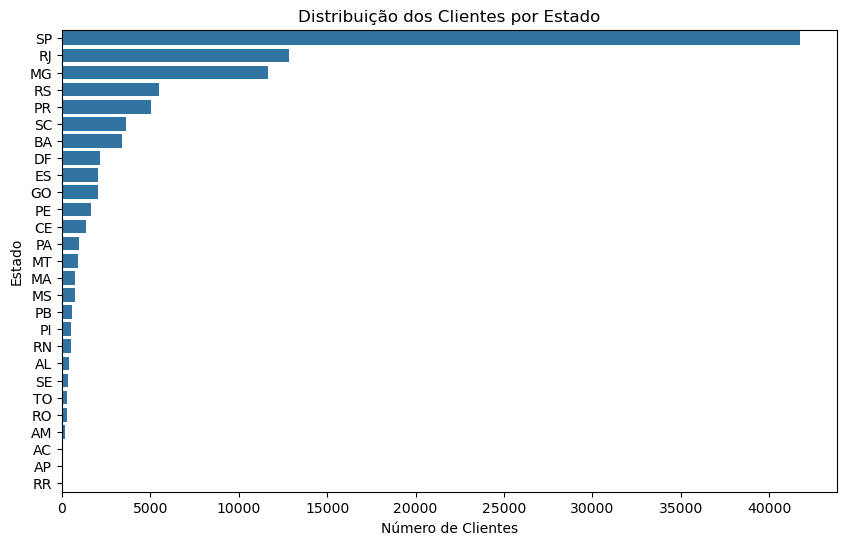

In [5]:
# Análise da distribuição dos estados dos clientes
plt.figure(figsize=(10, 6))
sns.countplot(y='customer_state', data=df, order=df['customer_state'].value_counts().index)
plt.title('Distribuição dos Clientes por Estado')
plt.xlabel('Número de Clientes')
plt.ylabel('Estado')
plt.show()

# 6. Pré-processamento


In [6]:
# Criando uma variável alvo fictícia para segmentação (clientes de SP e RJ como "1" e outros como "0")
df['target'] = df['customer_state'].apply(lambda x: 1 if x in ['SP', 'RJ'] else 0)

# Selecionando as variáveis
features = ['customer_zip_code_prefix']
X = df[features]
y = df['target']

# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 7. Divisão dos dados em treino e teste


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 8. Treinamento e Avaliação dos Modelos com Otimização de Hiperparâmetros



Random Forest - Melhor acurácia: 1.0

Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13416
           1       1.00      1.00      1.00     16417

    accuracy                           1.00     29833
   macro avg       1.00      1.00      1.00     29833
weighted avg       1.00      1.00      1.00     29833



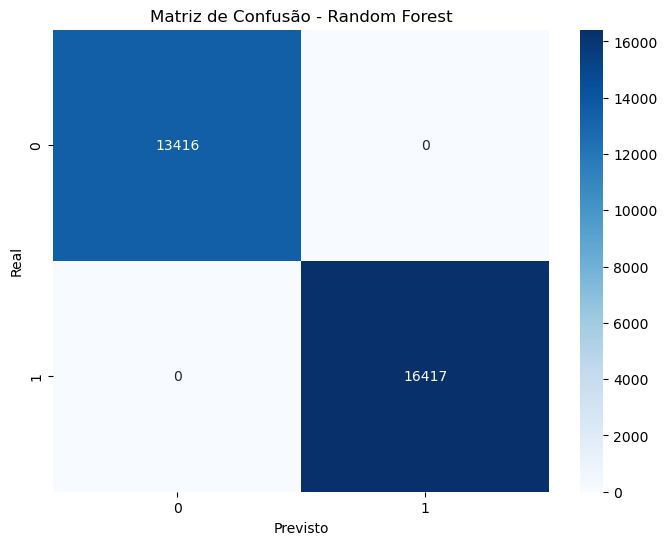


SVM - Melhor acurácia: 0.9944021720913083

Relatório de Classificação para SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13416
           1       1.00      0.99      0.99     16417

    accuracy                           0.99     29833
   macro avg       0.99      0.99      0.99     29833
weighted avg       0.99      0.99      0.99     29833



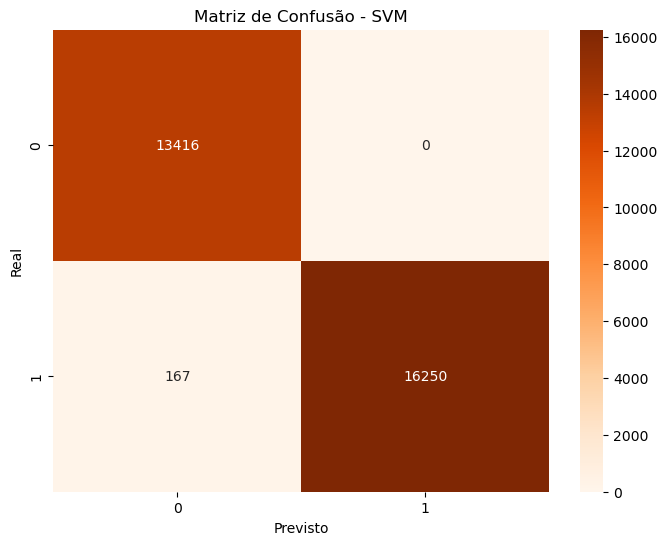


KNN - Melhor acurácia: 1.0

Relatório de Classificação para KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13416
           1       1.00      1.00      1.00     16417

    accuracy                           1.00     29833
   macro avg       1.00      1.00      1.00     29833
weighted avg       1.00      1.00      1.00     29833



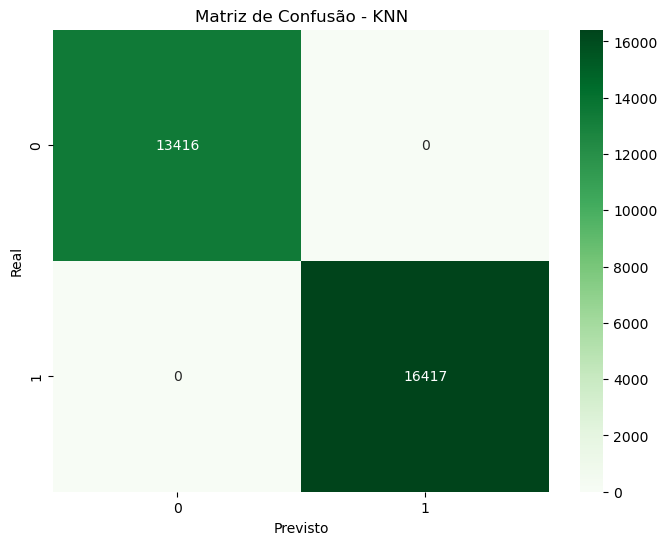

C:\Users\kaikm\AppData\Local\Temp\ipykernel_15224\2944492686.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


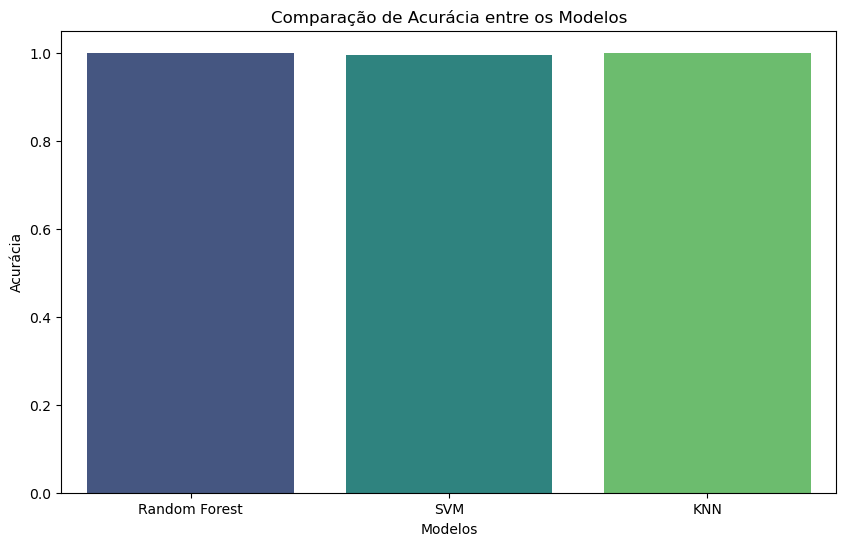

In [8]:
# Dicionário para armazenar os resultados
results = {}

# Random Forest com GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Melhor modelo Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = accuracy_rf
print("\nRandom Forest - Melhor acurácia:", accuracy_rf)
print("\nRelatório de Classificação para Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusão para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# SVM com GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Melhor modelo SVM
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
results['SVM'] = accuracy_svm
print("\nSVM - Melhor acurácia:", accuracy_svm)
print("\nRelatório de Classificação para SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusão para SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Oranges")
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# KNN com GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Melhor modelo KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
results['KNN'] = accuracy_knn
print("\nKNN - Melhor acurácia:", accuracy_knn)
print("\nRelatório de Classificação para KNN:")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusão para KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Greens")
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Comparação das acurácias entre os modelos
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Comparação de Acurácia entre os Modelos")
plt.xlabel("Modelos")
plt.ylabel("Acurácia")
plt.show()

# 9. Conclusão


In [9]:
print("\nConclusão:")
print("A comparação dos modelos indica que o modelo com melhor desempenho é:", max(results, key=results.get))
print("Esse modelo pode ser usado para segmentação geográfica dos clientes, visando estratégias de marketing regionais.")


Conclusão:
A comparação dos modelos indica que o modelo com melhor desempenho é: Random Forest
Esse modelo pode ser usado para segmentação geográfica dos clientes, visando estratégias de marketing regionais.
